                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

            Dividends  Stock Splits  
Date                                 
1999-01-22        0.0           0.0  
1999-01-25        0.0           0.0  
1999-01-26        0.0           0.0  
1999-01-27        0.0           0.0  
1999-01-28        0.0           0.0  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  119.169998  119.949997  113.440002

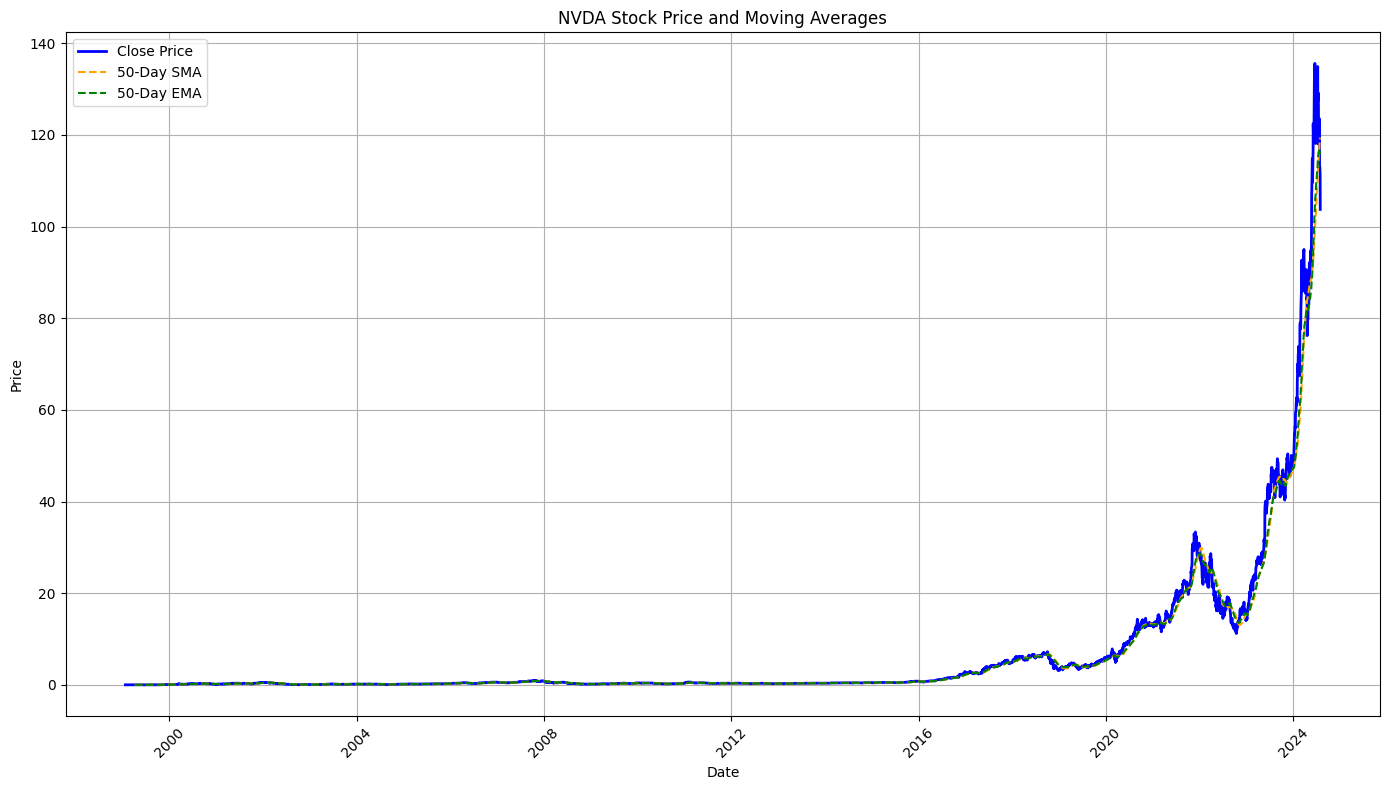

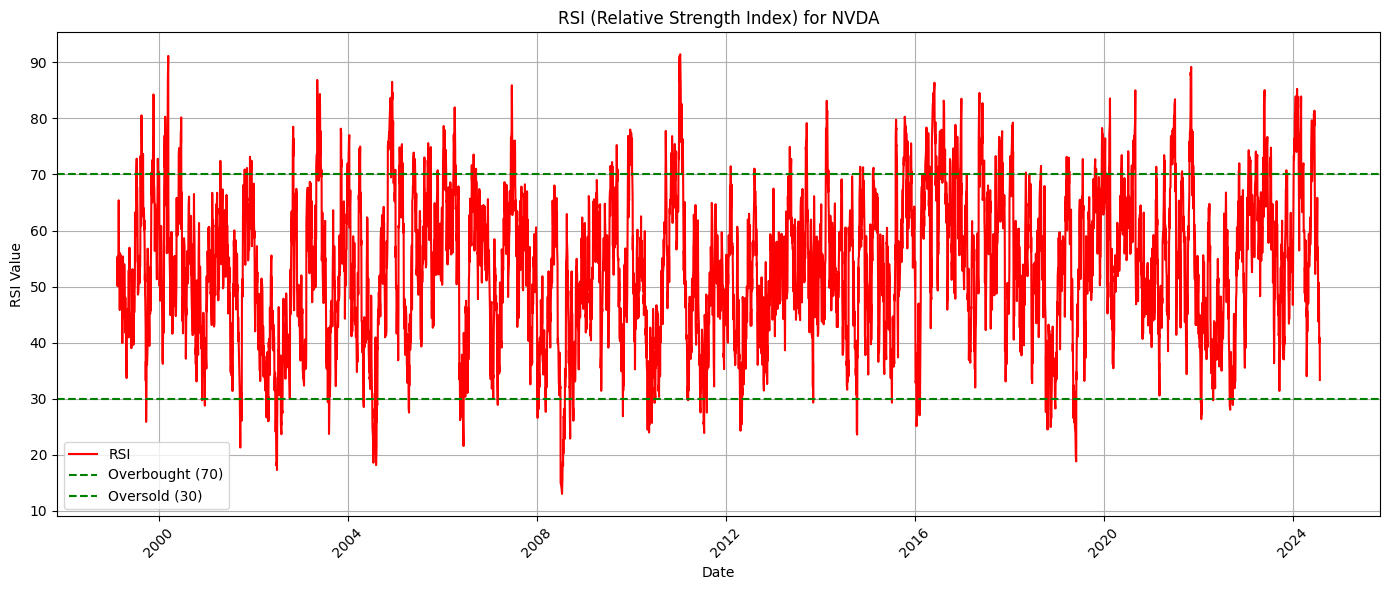

C:\Users\HP\AppData\Local\Temp\ipykernel_1568\1951402765.py:77: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


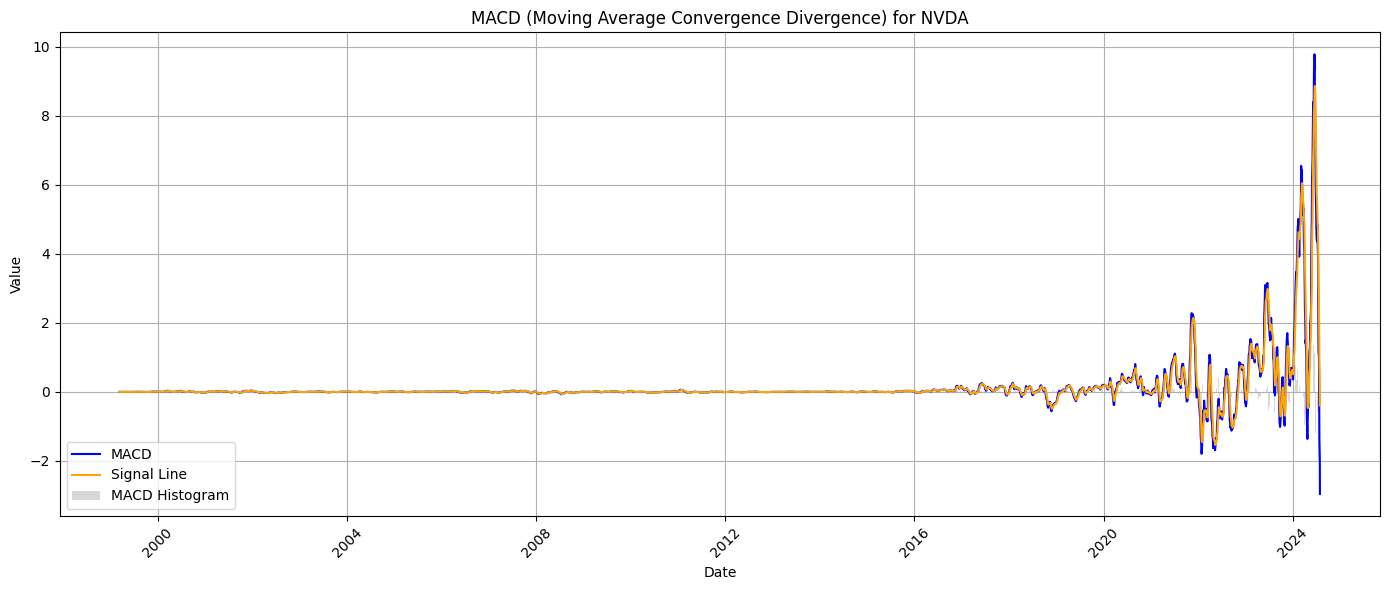

In [5]:
import os
import sys
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns




sys.path.append(os.path.abspath("../src"))
# Load NVDA historical data from the CSV file
df = pd.read_csv("../data/NVDA_historical_data.csv")

# Convert 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure data has the required columns
print(df.head())  # Check the first few rows

# Calculate Moving Average (SMA and EMA)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_50'] = talib.EMA(df['Close'], timeperiod=50)

# Calculate RSI
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows of the data with calculated indicators
print(df.tail())

# Plot Close price, SMA, and EMA
plt.figure(figsize=(14, 8))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(df['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')
plt.plot(df['EMA_50'], label='50-Day EMA', color='green', linestyle='--')
plt.title("NVDA Stock Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(df['RSI'], label='RSI', color='red')
plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("RSI (Relative Strength Index) for NVDA")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MACD and Signal line
plt.figure(figsize=(14, 6))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.3)
plt.title("MACD (Moving Average Convergence Divergence) for NVDA")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
